In [1]:
import cv2
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

RECT_PATH = "rect.jpeg"
img = cv2.imread(RECT_PATH)

In [2]:
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(grey, (5, 5), 2, 2)

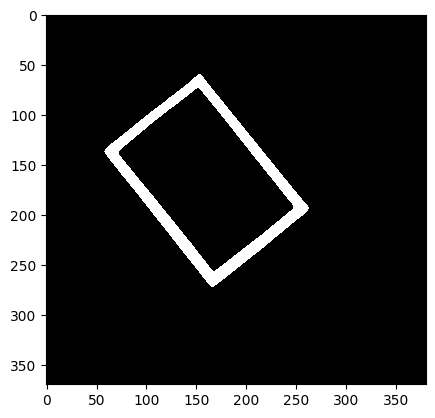

In [3]:
ok, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
inv_binary = cv2.bitwise_not(binary)
plt.imshow(inv_binary, cmap='gray')

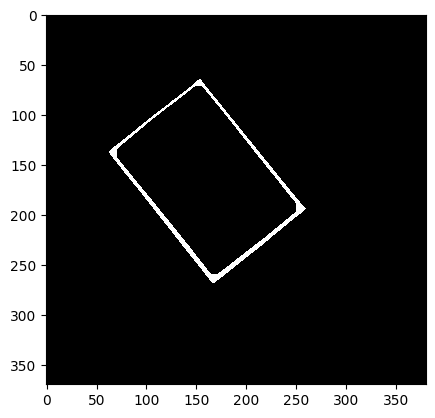

In [4]:
kernel = np.ones((5,5),np.uint8)
opened = cv2.morphologyEx(inv_binary, cv2.MORPH_OPEN, kernel)
kernel = np.ones((6,6),np.uint8)
eroded = cv2.erode(opened, kernel, iterations=1)
plt.imshow(eroded, cmap='gray')

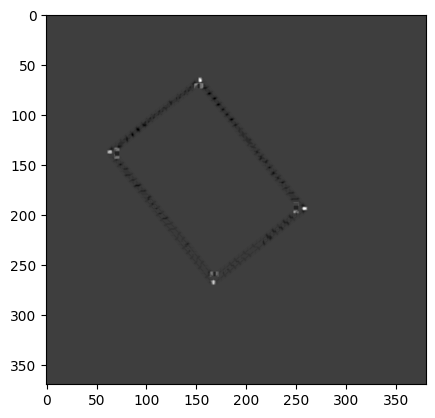

In [37]:
# try these?
# https://docs.opencv.org/4.8.0/df/d0c/tutorial_py_fast.html
# https://docs.opencv.org/4.8.0/dc/d0d/tutorial_py_features_harris.html
# https://docs.opencv.org/4.8.0/db/d27/tutorial_py_table_of_contents_feature2d.html
dst = cv2.cornerHarris(eroded, 5, 3, 0.04)
m = np.iinfo(np.uint8).max
cv2.normalize(dst, dst, alpha=0, beta=m, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
plt.imshow(dst, cmap='gray')

threshold: 0.0033618003129959107
x: 153.0, y: 71.0, r: 7.800000190734863
x: 169.0, y: 259.0, r: 7.800000190734863
x: 71.0, y: 137.0, r: 7.800000190734863
x: 251.0, y: 197.0, r: 7.800000190734863


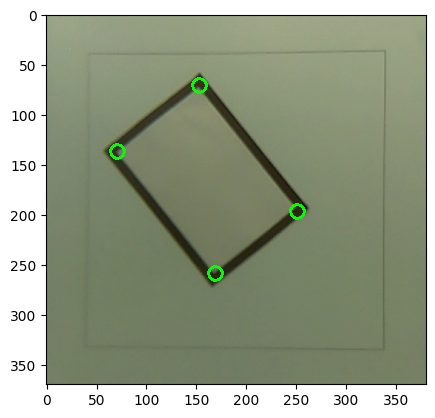

In [45]:
res = img.copy()
mask = dst.copy()
THRESHOLD = 0.075
threshold = THRESHOLD * dst.max()
assert(0 <= THRESHOLD and THRESHOLD <= 1)
print("threshold: {}".format(threshold))
mask[mask > threshold] = 255
mask[mask <= threshold] = 0
# merge similar regions
kernel = np.ones((8, 8), np.uint8)
mask = cv2.dilate(mask, kernel, iterations=1).astype(np.uint8)
# similar points to one
h, w = mask.shape

circles = cv2.HoughCircles(
    mask,
    method=cv2.HOUGH_GRADIENT,
    dp=2,
    minDist= w / 5,
    param1=3,
    param2=3,
    minRadius=3,
    maxRadius=9)
for c in circles[0,:]:
    if c is not None:
        x, y, r = c
        print("x: {}, y: {}, r: {}".format(x, y, r))
        x = int(x)
        y = int(y)
        r = int(r)
        cv2.circle(res, (x, y), r, (0, 255, 0), 2)
plt.imshow(res)


In [39]:
# play with FAST
# res = img.copy()
# mask = dst.copy()
# mask[mask > 0.1*mask.max()] = 255
# # merge similar regions
# kernel = np.ones((5, 5), np.uint8)
# mask = cv2.dilate(mask, kernel, iterations=1).astype(np.uint8)

# fast = cv2.FastFeatureDetector_create()
# kp = fast.detect(eroded, None)
# fast.setThreshold(100)
# fast.set
# fast.setType(cv2.FAST_FEATURE_DETECTOR_TYPE_5_8)
# cv2.drawKeypoints(eroded, kp, res, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG)
# # Print all default params
# print( "Threshold: {}".format(fast.getThreshold()) )
# print( "nonmaxSuppression:{}".format(fast.getNonmaxSuppression()) )
# print( "neighborhood: {}".format(fast.getType()) )
# print( "Total Keypoints with nonmaxSuppression: {}".format(len(kp)) )

# plt.imshow(res)


AttributeError: 'cv2.FastFeatureDetector' object has no attribute 'set'